#### Hotel Reviews Sentiment Analysis Using Natural Language Processing

Importing Required Libraries

In [1]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize

Reading the CSV Dataset 

In [2]:
df=pd.read_csv("Hotel_Reviews.csv")
df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,08-03-2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,08-03-2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677


In [3]:
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [4]:
df.shape

(515738, 17)

In [5]:
df.dtypes

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object

In [6]:
df["Review_Date"]=df["Review_Date"].astype("datetime64[ns]")
df.dtypes

Hotel_Address                                         object
Additional_Number_of_Scoring                           int64
Review_Date                                   datetime64[ns]
Average_Score                                        float64
Hotel_Name                                            object
Reviewer_Nationality                                  object
Negative_Review                                       object
Review_Total_Negative_Word_Counts                      int64
Total_Number_of_Reviews                                int64
Positive_Review                                       object
Review_Total_Positive_Word_Counts                      int64
Total_Number_of_Reviews_Reviewer_Has_Given             int64
Reviewer_Score                                       float64
Tags                                                  object
days_since_review                                     object
lat                                                  float64
lng                     

In [7]:
df.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [8]:
df["lat"]=df["lat"].fillna(df["lat"].mode()[0])
df["lng"]=df["lng"].fillna(df["lng"].mode()[0])

In [9]:
df.isnull().sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(526)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(515212, 17)

In [13]:
df = df[['Positive_Review', 'Negative_Review', 'Reviewer_Score']]
df

,Positive_Review,Negative_Review,Reviewer_Score
0,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,2.9
1,No real complaints the hotel was great great ...,No Negative,7.5
2,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,7.1
3,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...,3.8
4,Amazing location and building Romantic setting,You When I booked with your company on line y...,6.7
...,...,...,...
515733,location,no trolly or staff to help you take the lugga...,7.0
515734,Breakfast was ok and we got earlier check in,The hotel looks like 3 but surely not 4,5.8
515735,No Positive,The ac was useless It was a hot week in vienn...,2.5
515736,The rooms are enormous and really comfortable...,No Negative,8.8


In [14]:
df["review"]=df["Positive_Review"]+" "+ df["Negative_Review"]
df

C:\Users\valka\AppData\Local\Temp\ipykernel_11764\1161232044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"]=df["Positive_Review"]+" "+ df["Negative_Review"]


,Positive_Review,Negative_Review,Reviewer_Score,review
0,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,2.9,Only the park outside of the hotel was beauti...
1,No real complaints the hotel was great great ...,No Negative,7.5,No real complaints the hotel was great great ...
2,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,7.1,Location was good and staff were ok It is cut...
3,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...,3.8,Great location in nice surroundings the bar a...
4,Amazing location and building Romantic setting,You When I booked with your company on line y...,6.7,Amazing location and building Romantic settin...
...,...,...,...,...
515733,location,no trolly or staff to help you take the lugga...,7.0,location no trolly or staff to help you take...
515734,Breakfast was ok and we got earlier check in,The hotel looks like 3 but surely not 4,5.8,Breakfast was ok and we got earlier check in ...
515735,No Positive,The ac was useless It was a hot week in vienn...,2.5,No Positive The ac was useless It was a hot w...
515736,The rooms are enormous and really comfortable...,No Negative,8.8,The rooms are enormous and really comfortable...


In [15]:
df["review_raw"]=df["review"].copy()

C:\Users\valka\AppData\Local\Temp\ipykernel_11764\1490312221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review_raw"]=df["review"].copy()


Labelling the Sentiment using the Reviewer_Score

In [16]:
def sentiment_label(score):
    if score >= 7:
        return "Positive"
    elif score <= 4:
        return "Negative"
    else: 
        return "Neutral"
    
df["sentiment"]=df["Reviewer_Score"].apply(sentiment_label)

C:\Users\valka\AppData\Local\Temp\ipykernel_11764\2093576534.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment"]=df["Reviewer_Score"].apply(sentiment_label)


Visualizations 

C:\Users\valka\AppData\Local\Temp\ipykernel_11764\2168149083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_length'] = df['review'].astype(str).apply(len)


<Figure size 640x480 with 0 Axes>

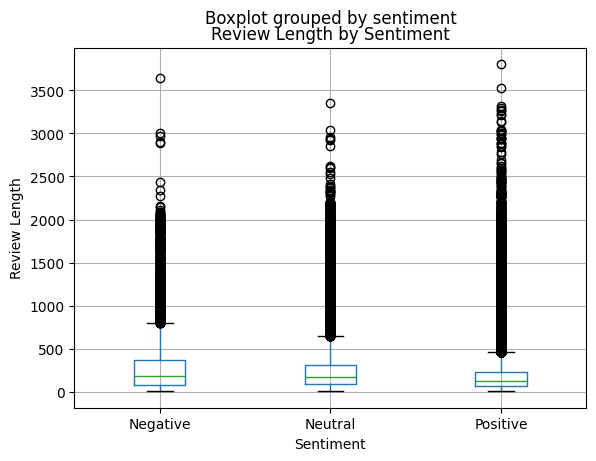

In [17]:
df['review_length'] = df['review'].astype(str).apply(len)

import matplotlib.pyplot as plt
plt.figure()
df.boxplot(column='review_length', by='sentiment')
plt.xlabel("Sentiment")
plt.ylabel("Review Length")
plt.title("Review Length by Sentiment")
plt.show()

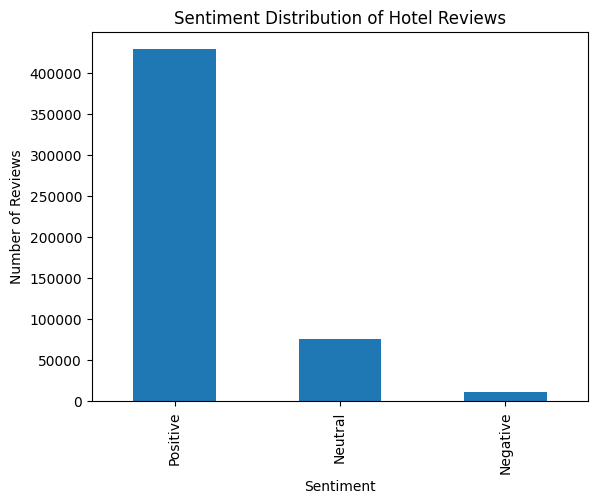

In [18]:
df['sentiment'].value_counts().plot(kind='bar')
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.title("Sentiment Distribution of Hotel Reviews")
plt.show()

<Figure size 640x480 with 0 Axes>

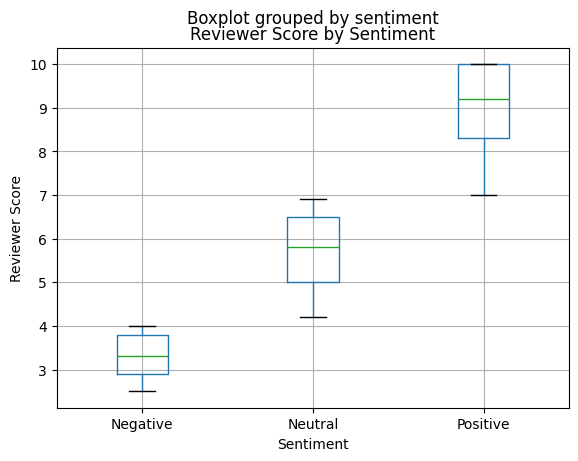

In [19]:
plt.figure()
df.boxplot(column='Reviewer_Score', by='sentiment')
plt.xlabel("Sentiment")
plt.ylabel("Reviewer Score")
plt.title("Reviewer Score by Sentiment")
plt.show()

In [20]:
df["review"]=df["review"].str.lower()
df.head()

C:\Users\valka\AppData\Local\Temp\ipykernel_11764\1453639278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"]=df["review"].str.lower()


,Positive_Review,Negative_Review,Reviewer_Score,review,review_raw,sentiment,review_length
0,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,2.9,only the park outside of the hotel was beauti...,Only the park outside of the hotel was beauti...,Negative,1914
1,No real complaints the hotel was great great ...,No Negative,7.5,no real complaints the hotel was great great ...,No real complaints the hotel was great great ...,Positive,623
2,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,7.1,location was good and staff were ok it is cut...,Location was good and staff were ok It is cut...,Positive,302
3,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...,3.8,great location in nice surroundings the bar a...,Great location in nice surroundings the bar a...,Negative,1222
4,Amazing location and building Romantic setting,You When I booked with your company on line y...,6.7,amazing location and building romantic settin...,Amazing location and building Romantic settin...,Neutral,775


In [21]:
df = df[["Reviewer_Score", "review", "review_raw", "sentiment"]]
df

,Reviewer_Score,review,review_raw,sentiment
0,2.9,only the park outside of the hotel was beauti...,Only the park outside of the hotel was beauti...,Negative
1,7.5,no real complaints the hotel was great great ...,No real complaints the hotel was great great ...,Positive
2,7.1,location was good and staff were ok it is cut...,Location was good and staff were ok It is cut...,Positive
3,3.8,great location in nice surroundings the bar a...,Great location in nice surroundings the bar a...,Negative
4,6.7,amazing location and building romantic settin...,Amazing location and building Romantic settin...,Neutral
...,...,...,...,...
515733,7.0,location no trolly or staff to help you take...,location no trolly or staff to help you take...,Positive
515734,5.8,breakfast was ok and we got earlier check in ...,Breakfast was ok and we got earlier check in ...,Neutral
515735,2.5,no positive the ac was useless it was a hot w...,No Positive The ac was useless It was a hot w...,Negative
515736,8.8,the rooms are enormous and really comfortable...,The rooms are enormous and really comfortable...,Positive


Punctuation Removal

In [22]:
punc_to_remove = string.punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punc_to_remove))

df["review"] = df["review"].apply(lambda text: remove_punctuation(text))
df.head(2)

C:\Users\valka\AppData\Local\Temp\ipykernel_11764\1960829779.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"] = df["review"].apply(lambda text: remove_punctuation(text))


,Reviewer_Score,review,review_raw,sentiment
0,2.9,only the park outside of the hotel was beauti...,Only the park outside of the hotel was beauti...,Negative
1,7.5,no real complaints the hotel was great great ...,No real complaints the hotel was great great ...,Positive


Stop words removal

In [23]:
import nltk
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return " ".join(filtered_text)

df["review"]=df["review"].apply(lambda text: remove_stopwords(text))
df.head(2)

C:\Users\valka\AppData\Local\Temp\ipykernel_11764\3195022751.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"]=df["review"].apply(lambda text: remove_stopwords(text))


,Reviewer_Score,review,review_raw,sentiment
0,2.9,park outside hotel beautiful angry made post a...,Only the park outside of the hotel was beauti...,Negative
1,7.5,real complaints hotel great great location sur...,No real complaints the hotel was great great ...,Positive


Top 10 Frequent words

In [24]:
from collections import Counter
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

counter = counter_word(df["review"])
counr=Counter(counter)
counr.most_common(10)

[('room', 316449),
 ('staff', 233854),
 ('location', 203641),
 ('hotel', 199839),
 ('breakfast', 142934),
 ('good', 132989),
 ('negative', 129548),
 ('great', 115497),
 ('friendly', 89905),
 ('helpful', 80480)]

Stemming

In [25]:
from nltk.stem import SnowballStemmer
import re

stemmer = SnowballStemmer("english")

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [stemmer.stem(word) for word in words]
    return " ".join(words)

df["review"] = df["review"].apply(preprocess_text)

C:\Users\valka\AppData\Local\Temp\ipykernel_11764\1164901488.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"] = df["review"].apply(preprocess_text)


In [26]:
pip install wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.


Wordcloud

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

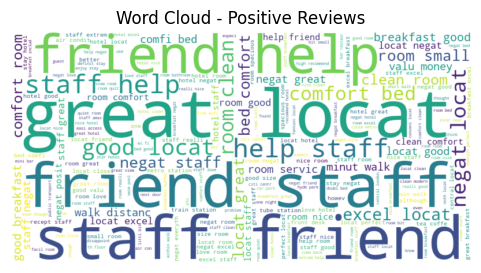

In [28]:
positive_text = " ".join(df[df["sentiment"] == "Positive"]["review"])

wordcloud_positive = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=200
).generate(positive_text)

plt.figure(figsize=(6,3))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Positive Reviews")
plt.show()


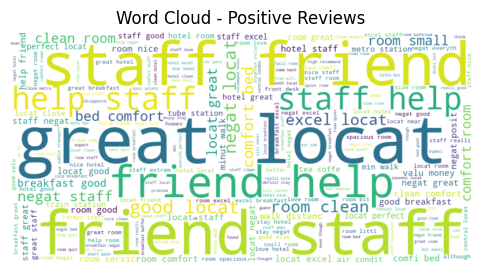

In [29]:
positive_text = " ".join(df[df["sentiment"] == "Positive"]["review"])

wordcloud_positive = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=200
).generate(positive_text)

plt.figure(figsize=(6,3))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Positive Reviews")
plt.show()


Train Test Splitting 

In [30]:
x=df["review"]
y=df["sentiment"]

In [31]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

TDIDF Vectorization

TF-IDF inherently reduces dimensionality by down-weighting common words, making it suitable for large text datasets.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    min_df=5,
    max_df=0.8,
    ngram_range=(1,2)
)

x_train_tfidf = tfidf.fit_transform(xtrain)
x_test_tfidf  = tfidf.transform(xtest)

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(ytrain)
y_test_enc  = le.transform(ytest)

print(le.classes_)

['Negative' 'Neutral' 'Positive']


In [34]:
from sklearn.metrics import classification_report,accuracy_score

In [35]:
x_train=x_train_tfidf
x_test=x_test_tfidf

y_train=y_train_enc
y_test=y_test_enc

Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
ypred=lr.predict(x_test)
print(accuracy_score(y_test,ypred))
print(classification_report(y_test, ypred))

e:\Software Python\Final Project\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8696979891824745
              precision    recall  f1-score   support

           0       0.63      0.18      0.28      3235
           1       0.61      0.44      0.51     22780
           2       0.90      0.96      0.93    128549

    accuracy                           0.87    154564
   macro avg       0.71      0.53      0.57    154564
weighted avg       0.85      0.87      0.86    154564



Multinomial Naive Bayes

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

nb=MultinomialNB()
nb.fit(x_train,y_train)
ypred=nb.predict(x_test)
print(accuracy_score(y_test,ypred))
print(classification_report(y_test, ypred))

0.8584469863616366
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3235
           1       0.60      0.28      0.39     22780
           2       0.88      0.98      0.93    128549

    accuracy                           0.86    154564
   macro avg       0.49      0.42      0.44    154564
weighted avg       0.82      0.86      0.83    154564



e:\Software Python\Final Project\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\Software Python\Final Project\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\Software Python\Final Project\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", res

Linear SVC

In [38]:
from sklearn.svm import LinearSVC

svm = LinearSVC(class_weight='balanced',random_state=42)
svm.fit(x_train,y_train)
ypred=svm.predict(x_test)
print(accuracy_score(y_test,ypred))
print(classification_report(y_test, ypred))


0.8442198700861779
              precision    recall  f1-score   support

           0       0.31      0.25      0.28      3235
           1       0.50      0.55      0.52     22780
           2       0.92      0.91      0.92    128549

    accuracy                           0.84    154564
   macro avg       0.58      0.57      0.57    154564
weighted avg       0.85      0.84      0.85    154564



Pretrained Model - Roberta Model

A transformer-based deep learning model that captures contextual meaning effectively.

In [39]:
from transformers import pipeline

sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment"
)

label_map = {
    "LABEL_0": "Negative",
    "LABEL_1": "Neutral",
    "LABEL_2": "Positive"
}

for text in df["review_raw"].head(5):
    result = sentiment_pipeline(text[:512])  
    label = label_map[result[0]["label"]]
    score = result[0]["score"]

    print("Review:", text[:200], "...")
    print("Predicted Sentiment:", label, "| Score:", round(score, 3))
    print()


e:\Software Python\Final Project\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu


Review:  Only the park outside of the hotel was beautiful   I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this pla ...
Predicted Sentiment: Negative | Score: 0.565

Review:  No real complaints the hotel was great great location surroundings rooms amenities and service Two recommendations however firstly the staff upon check in are very confusing regarding deposit payment ...
Predicted Sentiment: Positive | Score: 0.603

Review:  Location was good and staff were ok It is cute hotel the breakfast range is nice Will go back   Rooms are nice but for elderly a bit difficult as most rooms are two story with narrow steps So ask for ...
Predicted Sentiment: Positive | Score: 0.922

Review:  Great location in nice surroundings the bar and restaurant are nice and have a lovely outdoor area The building also has quite some character   My room was dirty and I was afraid to walk barefoot on  ...
Predicted 

Loading the model

In [40]:
import joblib 

model = lr
joblib.dump(model, 'sentiment_model.pkl')
vectorizer = tfidf
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']